<a href="https://colab.research.google.com/github/Muslunun/--ssizlik-ve-Enflasyon-Time-Series-/blob/main/Dolar_TL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
%matplotlib inline

In [ ]:
end = dt.datetime.now()
#start = dt.datetime(end.year-2, end.month, end.day)
start = dt.datetime(2005, 1, 1)
df = web.DataReader("USDTRY=X", 'yahoo', start, end)
df.to_csv('USDTRY=X.csv')



In [ ]:
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2005-01-03,1.34550,1.33680,1.34550,1.34400,0.0,1.34400
2005-01-04,1.35100,1.33680,1.33680,1.35100,0.0,1.35100
2005-01-05,1.38650,1.35450,1.35450,1.37400,0.0,1.37400
2005-01-06,1.40580,1.37800,1.37800,1.39250,0.0,1.39250
2005-01-07,1.39400,1.36150,1.38700,1.39400,0.0,1.39400
...,...,...,...,...,...,...
2021-02-15,7.03051,6.94330,7.02960,7.02890,0.0,7.02890
2021-02-16,7.00899,6.89542,6.95680,6.95690,0.0,6.95690
2021-02-17,7.05195,6.96897,6.98290,6.98240,0.0,6.98240


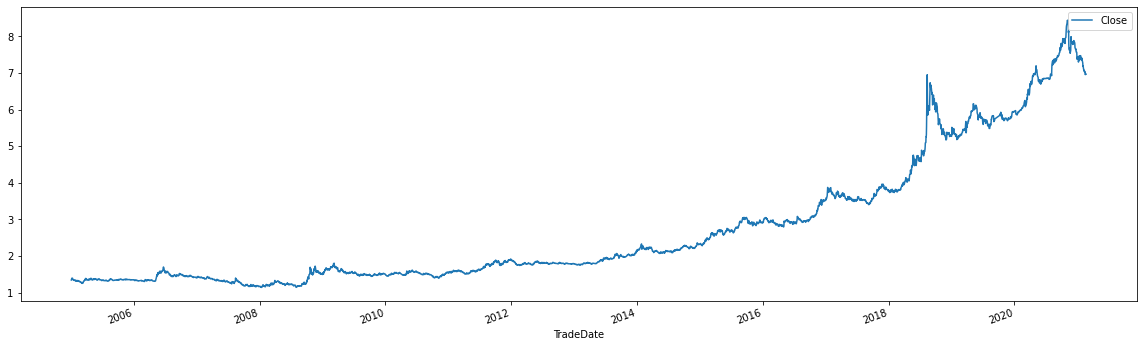

In [ ]:

# Creating a column as date
df['TradeDate']=df.index

# Plotting the stock prices
%matplotlib inline
df.plot(x='TradeDate', y='Close', kind='line', figsize=(20,6), rot=20)

df['TradeDate']=df.index
 
# Plotting the stock prices
%matplotlib inline
df.plot(x='TradeDate', y='Close', kind='line', figsize=(20,6), rot=20)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
values = df['Close'].values.reshape(-1,1)
values = values.astype('float32')
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(values)
dataset[0:5]

array([[0.02763695],
       [0.02859609],
       [0.03174755],
       [0.03428243],
       [0.03448796]], dtype=float32)

In [ ]:
TRAIN_SIZE = 0.60

train_size = int(len(dataset) * TRAIN_SIZE)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size, :], dataset[train_size:len(dataset), :]
print("Number of entries (training set, test set): " + str((len(train), len(test))))

Number of entries (training set, test set): (2505, 1670)


In [ ]:
def create_dataset(dataset, window_size = 1):
    data_X, data_Y = [], []
    for i in range(len(dataset) - window_size - 1):
        a = dataset[i:(i + window_size), 0]
        data_X.append(a)
        data_Y.append(dataset[i + window_size, 0])
    return(np.array(data_X), np.array(data_Y))

In [ ]:
window_size = 1
train_X, train_Y = create_dataset(train, window_size)
test_X, test_Y = create_dataset(test, window_size)
print("Original training data shape:")
print(train_X.shape)

# Reshape the input data into appropriate form for Keras.
train_X = np.reshape(train_X, (train_X.shape[0], 1, train_X.shape[1]))
test_X = np.reshape(test_X, (test_X.shape[0], 1, test_X.shape[1]))
print("New training data shape:")
print(train_X.shape)

Original training data shape:
(2503, 1)
New training data shape:
(2503, 1, 1)


In [ ]:

model = Sequential()
model.add(LSTM(100, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
history = model.fit(train_X, train_Y, epochs=1000, batch_size=100, validation_data=(test_X, test_Y), verbose=1, shuffle=False)

Epoch 1/1000
26/26 [==============================] - 2s 26ms/step - loss: 0.0222 - val_loss: 0.3197
Epoch 2/1000
26/26 [==============================] - 0s 6ms/step - loss: 0.0500 - val_loss: 0.3312
Epoch 3/1000
26/26 [==============================] - 0s 5ms/step - loss: 0.0278 - val_loss: 0.3177
Epoch 4/1000
26/26 [==============================] - 0s 5ms/step - loss: 0.0276 - val_loss: 0.3056
Epoch 5/1000
26/26 [==============================] - 0s 5ms/step - loss: 0.0240 - val_loss: 0.2822
Epoch 6/1000
26/26 [==============================] - 0s 6ms/step - loss: 0.0271 - val_loss: 0.2716
Epoch 7/1000
26/26 [==============================] - 0s 5ms/step - loss: 0.0217 - val_loss: 0.2421
Epoch 8/1000
26/26 [==============================] - 0s 6ms/step - loss: 0.0272 - val_loss: 0.2340
Epoch 9/1000
26/26 [==============================] - 0s 6ms/step - loss: 0.0188 - val_loss: 0.1910
Epoch 10/1000
26/26 [==============================] - 0s 5ms/step - loss: 0.0301 - val_loss: 0.192

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 100)               40800     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


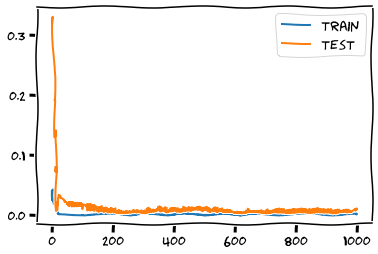

In [ ]:
with plt.xkcd():
    plt.plot(history.history['loss'], label='train')
    plt.plot(history.history['val_loss'], label='test')
    plt.legend()
    plt.show()

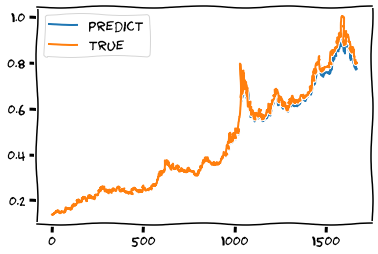

In [ ]:

with plt.xkcd():
    yhat = model.predict(test_X)
    plt.plot(yhat, label='predict')
    plt.plot(test_Y, label='true')
    plt.legend()
    plt.show()

In [ ]:
yhat_inverse = scaler.inverse_transform(yhat.reshape(-1, 1))
test_Y_inverse = scaler.inverse_transform(test_Y.reshape(-1, 1))
from math import sqrt
from sklearn.metrics import mean_squared_error
rmse = sqrt(mean_squared_error(test_Y_inverse, yhat_inverse))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 0.118


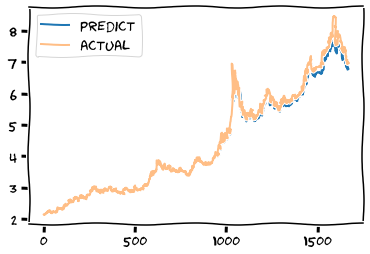

In [ ]:
with plt.xkcd():
    plt.plot(yhat_inverse, label='predict')
    plt.plot(test_Y_inverse, label='actual', alpha=0.5)
    plt.legend()
    plt.show()

In [ ]:
predictDates = df.tail(len(test_X)).index
test_Y_reshape = test_Y_inverse.reshape(len(test_Y_inverse))
yhat_reshape = yhat_inverse.reshape(len(yhat_inverse))
import plotly.offline as py
import plotly.graph_objs as go
import seaborn as sns

actual_chart = go.Scatter(x=predictDates, y=test_Y_reshape, name= 'Gerçek Değer')
predict_chart = go.Scatter(x=predictDates, y=yhat_reshape, name= 'Tahmin Edilen Değer')
py.iplot([predict_chart, actual_chart])

In [ ]:
score=model.evaluate(test_X, test_Y,batch_size=100)

model.summary()


17/17 [==============================] - 0s 2ms/step - loss: 0.0099
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 100)               40800     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [ ]:
score

0.00985737144947052

In [ ]:
Last10Days=np.array([6.9,6.99,6.94,6.85,6.92,7,7.01,6.98,7.05])
 
# Normalizing the data just like we did for training the model
Last10Days=DataScaler.transform(Last10Days.reshape(-1,1))
 
# Changing the shape of the data to 3D
# Choosing TimeSteps as 10 because we have used the same for training
NumSamples=1
TimeSteps=9
NumFeatures=1
Last10Days=Last10Days.reshape(NumSamples,TimeSteps,NumFeatures)
 
#############################
 
# Making predictions on data
predicted_Price = model.predict(Last10Days)
predicted_Price = DataScaler.inverse_transform(predicted_Price)
predicted_Price


array([[18.118153]], dtype=float32)

In [ ]:
x_list = df['Close'].tolist()
def split_sequence(sequence, n_steps):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return np.array(X), np.array(y)

In [ ]:
X, y = split_sequence(x_list, n_steps=4)
# reshape from [samples, timesteps] into [samples, subsequences, timesteps, features]
n_features = 1
n_seq = 2
n_steps = 2
X = X.reshape((X.shape[0], n_seq, n_steps, n_features))

In [ ]:
from keras.layers import Bidirectional, Flatten, TimeDistributed, ConvLSTM2D
from keras.layers.convolutional import Conv1D, MaxPooling1D
from keras.layers.core import Dense, Activation, Dropout
model2 = Sequential()
model2.add(TimeDistributed(Conv1D(filters=64, kernel_size=1, activation='relu'), input_shape=(None, n_steps, n_features)))
model2.add(TimeDistributed(MaxPooling1D(pool_size=2)))
model2.add(TimeDistributed(Flatten()))
model2.add(LSTM(50, activation='relu'))
model2.add(Dense(1))
model2.compile(optimizer='adam', loss='mse')

In [ ]:
model2.fit(X, y, epochs=50, verbose=1)

Epoch 1/50
131/131 [==============================] - 2s 3ms/step - loss: 3.4311
Epoch 2/50
131/131 [==============================] - 0s 3ms/step - loss: 0.0147
Epoch 3/50
131/131 [==============================] - 0s 3ms/step - loss: 0.0063
Epoch 4/50
131/131 [==============================] - 0s 3ms/step - loss: 0.0052
Epoch 5/50
131/131 [==============================] - 0s 3ms/step - loss: 0.0042
Epoch 6/50
131/131 [==============================] - 0s 3ms/step - loss: 0.0041
Epoch 7/50
131/131 [==============================] - 0s 3ms/step - loss: 0.0047
Epoch 8/50
131/131 [==============================] - 0s 3ms/step - loss: 0.0034
Epoch 9/50
131/131 [==============================] - 0s 3ms/step - loss: 0.0045
Epoch 10/50
131/131 [==============================] - 0s 3ms/step - loss: 0.0053
Epoch 11/50
131/131 [==============================] - 0s 3ms/step - loss: 0.0038
Epoch 12/50
131/131 [==============================] - 0s 3ms/step - loss: 0.0047
Epoch 13/50
131/131 [====

In [ ]:
x_input = np.array([6.96 , 6.77, 6.75, 6.89])
x_input = x_input.reshape((1, n_seq, n_steps, n_features))
yhat = model2.predict(x_input, verbose=0)
print(yhat) 

[[6.884872]]


In [ ]:
x_input2= np.array([7,7.05,7.1,7.12])
x_input2 = x_input.reshape((1, n_seq, n_steps, n_features))
yhat = model2.predict(x_input2, verbose=0)
print(yhat) 

[[6.884872]]


In [ ]:
PROPHET

In [ ]:
pip install fbprophet
